# Projeto-4

### Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import geopandas as gpd


### Leitura do arquivo e tratamento dos dados

In [5]:
df_gas = pd.read_csv('2004-2021.tsv', sep='\t', parse_dates=True)
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

In [6]:
df_gas = pd.read_csv('2004-2021.tsv', sep='\t', parse_dates=['DATA INICIAL', 'DATA FINAL'])
df_gas['ANO'] = df_gas['DATA FINAL'].dt.year
df_gas['MÊS'] = df_gas['DATA FINAL'].dt.month
df_gas.head()


DATA INICIAL DATA FINAL        REGIÃO              ESTADO           PRODUTO  \
0   2004-05-09 2004-05-15  CENTRO OESTE    DISTRITO FEDERAL  ETANOL HIDRATADO   
1   2004-05-09 2004-05-15  CENTRO OESTE               GOIAS  ETANOL HIDRATADO   
2   2004-05-09 2004-05-15  CENTRO OESTE         MATO GROSSO  ETANOL HIDRATADO   
3   2004-05-09 2004-05-15  CENTRO OESTE  MATO GROSSO DO SUL  ETANOL HIDRATADO   
4   2004-05-09 2004-05-15      NORDESTE             ALAGOAS  ETANOL HIDRATADO   

   NÚMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  PREÇO MÉDIO REVENDA  \
0                           127              R$/l                1.288   
1                           387              R$/l                1.162   
2                           192              R$/l                1.389   
3                           162              R$/l                1.262   
4                           103              R$/l                1.181   

   DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
0                  0.016                  1.19                 1.350   
1                  0.114                  0.89                 1.449   
2                  0.097                  1.18                 1.760   
3                  0.070                  1.09                 1.509   
4                  0.078                  1.05                 1.400   

  MARGEM MÉDIA REVENDA  COEF DE VARIAÇÃO REVENDA PREÇO MÉDIO DISTRIBUIÇÃO  \
0                0.463                     0.012                    0.825   
1                0.399                     0.098                    0.763   
2                0.419                     0.070                     0.97   
3                0.432                     0.055                     0.83   
4                 0.24                     0.066                    0.941   

  DESVIO PADRÃO DISTRIBUIÇÃO PREÇO MÍNIMO DISTRIBUIÇÃO  \
0                       0.11                    0.4201   
1                      0.088                    0.5013   
2                      0.095                    0.5614   
3                      0.119                    0.5991   
4                      0.077                    0.7441   

  PREÇO MÁXIMO DISTRIBUIÇÃO COEF DE VARIAÇÃO DISTRIBUIÇÃO   ANO  MÊS  
0                    0.9666                         0.133  2004    5  
1                      1.05                         0.115  2004    5  
2                     1.161                         0.098  2004    5  
3                   1.22242                         0.143  2004    5  
4                    1.0317                         0.082  2004    5

In [7]:
df_gas.tail()

DATA INICIAL DATA FINAL    REGIÃO          ESTADO          PRODUTO  \
120818   2021-04-25 2021-05-01     NORTE         RORAIMA  OLEO DIESEL S10   
120819   2021-04-25 2021-05-01       SUL  SANTA CATARINA  OLEO DIESEL S10   
120820   2021-04-25 2021-05-01   SUDESTE       SAO PAULO  OLEO DIESEL S10   
120821   2021-04-25 2021-05-01  NORDESTE         SERGIPE  OLEO DIESEL S10   
120822   2021-04-25 2021-05-01     NORTE       TOCANTINS  OLEO DIESEL S10   

        NÚMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  PREÇO MÉDIO REVENDA  \
120818                            12              R$/l                4.582   
120819                           100              R$/l                4.141   
120820                           886              R$/l                4.246   
120821                            33              R$/l                4.464   
120822                            18              R$/l                4.352   

        DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
120818                  0.056                 4.510                 4.690   
120819                  0.187                 3.838                 4.739   
120820                  0.216                 3.769                 5.199   
120821                  0.205                 4.190                 4.699   
120822                  0.156                 4.199                 4.699   

       MARGEM MÉDIA REVENDA  COEF DE VARIAÇÃO REVENDA  \
120818             -99999.0                     0.012   
120819             -99999.0                     0.045   
120820             -99999.0                     0.051   
120821             -99999.0                     0.046   
120822             -99999.0                     0.036   

       PREÇO MÉDIO DISTRIBUIÇÃO DESVIO PADRÃO DISTRIBUIÇÃO  \
120818                 -99999.0                   -99999.0   
120819                 -99999.0                   -99999.0   
120820                 -99999.0                   -99999.0   
120821                 -99999.0                   -99999.0   
120822                 -99999.0                   -99999.0   

       PREÇO MÍNIMO DISTRIBUIÇÃO PREÇO MÁXIMO DISTRIBUIÇÃO  \
120818                  -99999.0                  -99999.0   
120819                  -99999.0                  -99999.0   
120820                  -99999.0                  -99999.0   
120821                  -99999.0                  -99999.0   
120822                  -99999.0                  -99999.0   

       COEF DE VARIAÇÃO DISTRIBUIÇÃO   ANO  MÊS  
120818                      -99999.0  2021    5  
120819                      -99999.0  2021    5  
120820                      -99999.0  2021    5  
120821                      -99999.0  2021    5  
120822                      -99999.0  2021    5

In [8]:
df_gas['PRODUTO'] = df_gas['PRODUTO'].apply(lambda x: 'ÓLEO DIESEL' if (x =='OLEO DIESEL') else x)
df_gas['PRODUTO'] = df_gas['PRODUTO'].apply(lambda x: 'ÓLEO DIESEL S10' if (x =='OLEO DIESEL S10') else x)


In [9]:
df_gas.replace('-99999.0', np.nan, inplace=True)

In [10]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DATA INICIAL                   120823 non-null  datetime64[ns]
 1   DATA FINAL                     120823 non-null  datetime64[ns]
 2   REGIÃO                         120823 non-null  object        
 3   ESTADO                         120823 non-null  object        
 4   PRODUTO                        120823 non-null  object        
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64         
 6   UNIDADE DE MEDIDA              120823 non-null  object        
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64       
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64       
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64       
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64       
 11  

### Objetivos!!

- Observar e discutir a presença de outliers
- Observar o aumento bruto e percentual de cada combustivel em todo período.
- Observar a evolução do preço médio dos combustíveis por região.
- Observar a quantidade de postos pesquisados por estado em 2004 e a quantidade média de postos por estado em 2021 e traçar um grafico de linha com o total de postos pesquisados ano a ano.
- Mapa de calor com valor médio do preço dos combustíveis de cada estado.
- Mapa de calor com quantidade média de postos pesquisados por estado.

- Observações:
- Há valores com -9999, devemos substituir por NaN?
- Gasolina Aditivada só temos valores entre 20-21, base de dados muito pequena em relação aos outros!

### Verificando a existencia de outliers no preço do produto.

Podemos observar nitidamente a discrepancia no valor do GLP em comparação dos outros.

In [11]:
fig=px.box(data_frame=df_gas, y='PREÇO MÉDIO REVENDA', color='PRODUTO')
fig.update_layout(template='presentation')

Essa discrepância acontece porque cada combustível é tabelado com unidades de medidas diferentes. Enquanto a gasolina comum, a gasolina aditivada, o óleo diesel e o óleo diesel s10 são vendidos por litro, o GNV é vendido por m3 e o GLP é vendido por botijão de 13kg. Por isso, decidimos observar os valores dos outliers por tipo de combustível. Além disso, como o dataframe é divido por semana no decorrer de 17 anos (Maio/2014 a Maio/2021), decidimos separar também por ano para facilitar ainda mais a observação da existência de outliers.

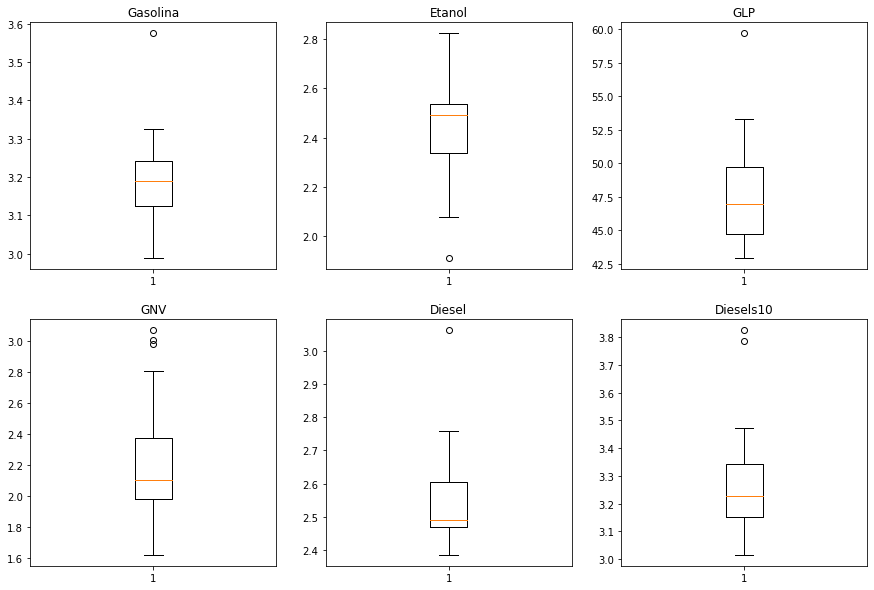

In [12]:
fig2, axs2 = plt.subplots(2, 3, figsize=(15,10))

valor_gasolina = df_gas[df_gas['PRODUTO']=='GASOLINA COMUM'].pivot_table(index='ESTADO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
valor_etanol = df_gas[df_gas['PRODUTO']=='ETANOL HIDRATADO'].pivot_table(index='ESTADO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
valor_glp = df_gas[df_gas['PRODUTO']=='GLP'].pivot_table(index='ESTADO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
valor_gnv = df_gas[df_gas['PRODUTO']=='GNV'].pivot_table(index='ESTADO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
valor_diesel = df_gas[df_gas['PRODUTO']=='ÓLEO DIESEL'].pivot_table(index='ESTADO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
valor_diesels10 = df_gas[df_gas['PRODUTO']=='ÓLEO DIESEL S10'].pivot_table(index='ESTADO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')


axs2[0,0].boxplot(valor_gasolina)
axs2[0,1].boxplot(valor_etanol)
axs2[0,2].boxplot(valor_glp)
axs2[1,0].boxplot(valor_gnv)
axs2[1,1].boxplot(valor_diesel)
axs2[1,2].boxplot(valor_diesels10)

axs2[0,0].set_title('Gasolina')
axs2[0,1].set_title('Etanol')
axs2[0,2].set_title('GLP')
axs2[1,0].set_title('GNV')
axs2[1,1].set_title('Diesel')
axs2[1,2].set_title('Diesels10');

In [13]:
df_precos_gasolina_c = df_gas.loc[df_gas["PRODUTO"]=='GASOLINA COMUM']

fig=px.box(data_frame=df_precos_gasolina_c, y='PREÇO MÉDIO REVENDA', x= 'ANO', color='ANO')

fig.update_layout(
    title='GASOLINA COMUM',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

In [14]:
df_precos_glp = df_gas.loc[df_gas["PRODUTO"]=='GLP']

fig=px.box(data_frame=df_precos_glp, y='PREÇO MÉDIO REVENDA', x= 'ANO', color='ANO')

fig.update_layout(
    title= 'GLP',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

In [15]:
df_precos_etanol = df_gas.loc[df_gas["PRODUTO"]=='ETANOL HIDRATADO']

fig=px.box(data_frame=df_precos_etanol, y='PREÇO MÉDIO REVENDA', x= 'ANO', color='ANO')

fig.update_layout(
    title='ETANOL HIDRATADO',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

In [16]:
df_precos_gasolina_a = df_gas.loc[df_gas["PRODUTO"]=='GASOLINA ADITIVADA']

fig=px.box(data_frame=df_precos_gasolina_a, y='PREÇO MÉDIO REVENDA', x= 'ANO', color='ANO')

fig.update_layout(
    title='GASOLINA ADITIVADA',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

In [17]:
df_precos_disel = df_gas.loc[df_gas["PRODUTO"]=='ÓLEO DIESEL']

fig=px.box(data_frame=df_precos_disel, y='PREÇO MÉDIO REVENDA', x= 'ANO', color='ANO')

fig.update_layout(
    title='ÓLEO DIESEL',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

In [18]:
df_precos_disel_10 = df_gas.loc[df_gas["PRODUTO"]=='ÓLEO DIESEL S10']

fig=px.box(data_frame=df_precos_disel_10, y='PREÇO MÉDIO REVENDA', x= 'ANO', color='ANO')

fig.update_layout(
    title='ÓLEO DIESEL S10',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

In [19]:
df_precos_gnv = df_gas.loc[df_gas["PRODUTO"]=='GNV']

fig=px.box(data_frame=df_precos_gnv, y='PREÇO MÉDIO REVENDA', x= 'ANO', color='ANO')

fig.update_layout(
    title='GNV',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

Observando cada combustível, pudemos identificar a existencia de alguns outliers, porém considerando que cada valor nos gráficos apresentados representa uma média de uma semana por estado, é natural que tenha alguns valores discrepantes, porém não os consideramos anomalias. Para ter uma análise ainda melhor dos outliers e a necessidade de removê-los ou não, poderíamos ainda fazer um recorte por estado.

### Evolução do preço médio dos combustíveis por região.

In [20]:
df_gas['REGIÃO'].unique()

array(['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'],
      dtype=object)

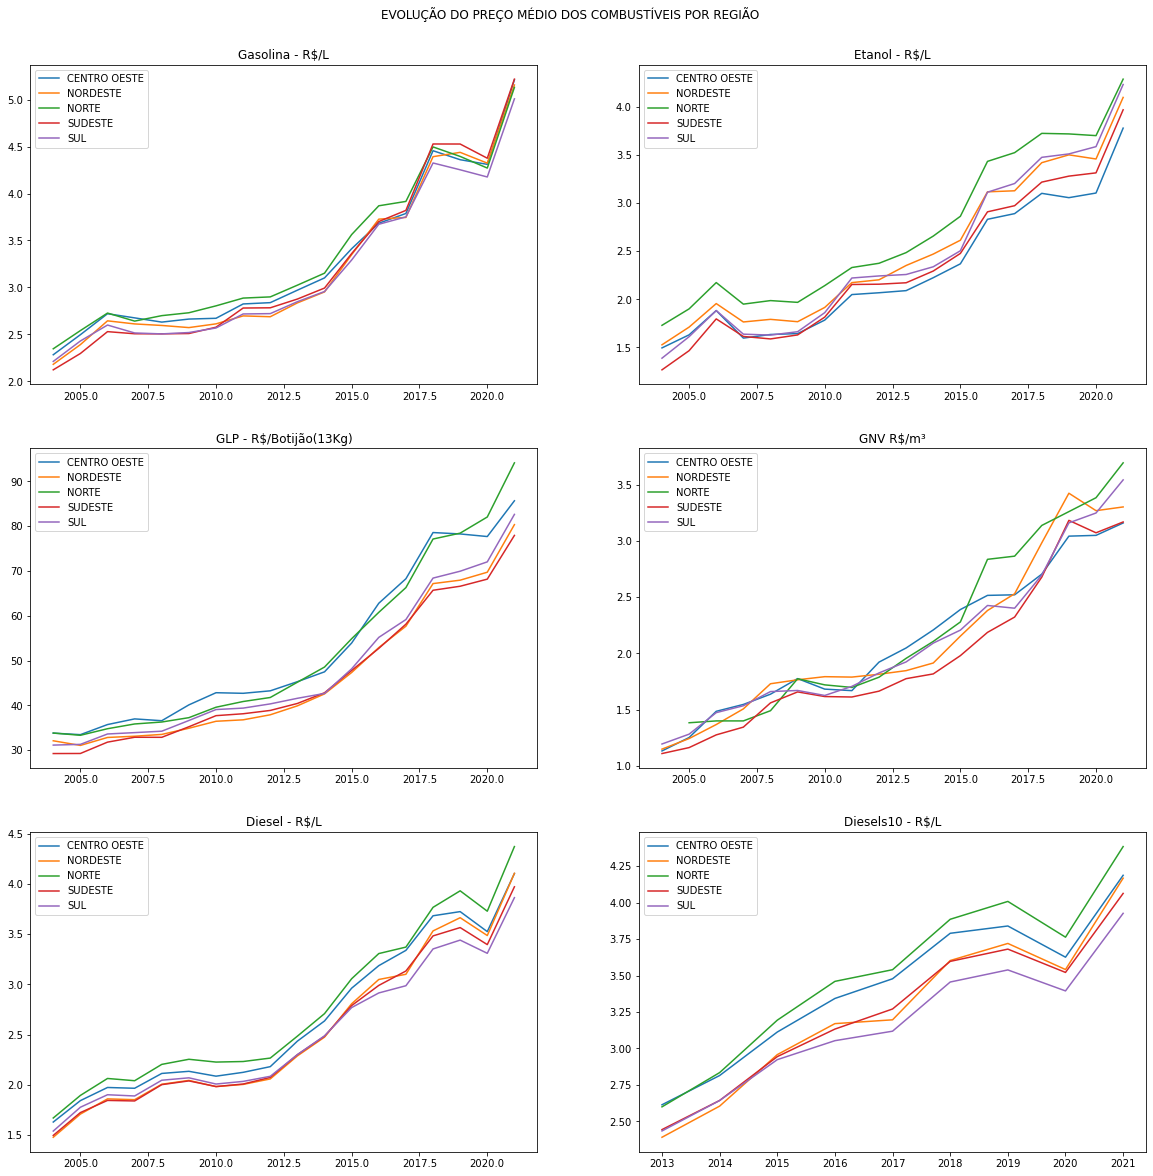

In [21]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))
fig.suptitle('EVOLUÇÃO DO PREÇO MÉDIO DOS COMBUSTÍVEIS POR REGIÃO', fontsize=12, y=0.92)

df_gasolina = df_gas[df_gas['PRODUTO']=='GASOLINA COMUM'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_etanol = df_gas[df_gas['PRODUTO']=='ETANOL HIDRATADO'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_glp = df_gas[df_gas['PRODUTO']=='GLP'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_gnv = df_gas[df_gas['PRODUTO']=='GNV'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_diesel = df_gas[df_gas['PRODUTO']=='ÓLEO DIESEL'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_diesels10 = df_gas[df_gas['PRODUTO']=='ÓLEO DIESEL S10'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')

axs[0,0].plot(df_gasolina)
axs[0,1].plot(df_etanol)
axs[1,0].plot(df_glp)
axs[1,1].plot(df_gnv)
axs[2,0].plot(df_diesel)
axs[2,1].plot(df_diesels10)

axs[0,0].set_title('Gasolina - R$/L')
axs[0,1].set_title('Etanol - R$/L')
axs[1,0].set_title('GLP - R$/Botijão(13Kg)')
axs[1,1].set_title('GNV R$/m³')
axs[2,0].set_title('Diesel - R$/L')
axs[2,1].set_title('Diesels10 - R$/L')

axs[0,0].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[0,1].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[1,0].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[1,1].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[2,0].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[2,1].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left');

- O Norte tem majoritariamente o maior preço dos diesels(comum e 10s) e do etanol e também do GNV a partir de 2015, do GLP a partir de 2018 e da gasolina entre 2008 e 2017. Com certeza é pior região em relação a preço.

- O Sudeste possui uma vantagem majoritária em relação a preço no GNV e GLP em relação as outras regiões
- O Centro-Oeste possui uma vantagem majoritária em relação a preço no etanol.
- O sul possui uma vantagem em preço no Diesel comum e s10 a partir de 2015.
- O nordeste possui preços intermediários em todos os combustíveis

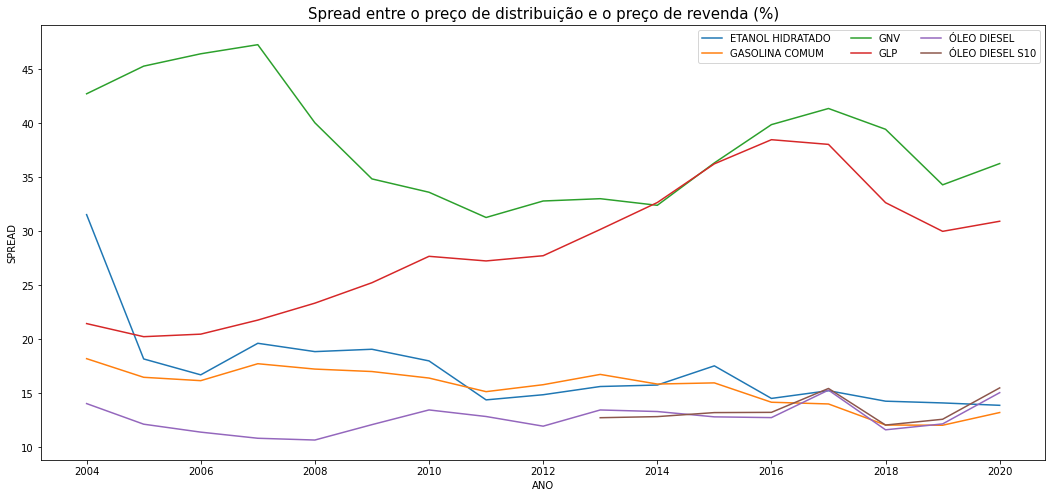

In [44]:
df_spread = df_gas.loc[:,['PREÇO MÉDIO DISTRIBUIÇÃO','PREÇO MÉDIO REVENDA', 'ANO', 'MÊS', 'PRODUTO']]
df_spread['PREÇO MÉDIO DISTRIBUIÇÃO'] = df_spread['PREÇO MÉDIO DISTRIBUIÇÃO'].replace('-', np.nan)
df_spread['PREÇO MÉDIO DISTRIBUIÇÃO'] = df_spread['PREÇO MÉDIO DISTRIBUIÇÃO'].astype('float64')
df_spread['SPREAD'] = (df_spread['PREÇO MÉDIO REVENDA'] - df_spread['PREÇO MÉDIO DISTRIBUIÇÃO'])/df_spread['PREÇO MÉDIO DISTRIBUIÇÃO']

ax_spread = df_spread.pivot_table(index='ANO', columns='PRODUTO', values='SPREAD', aggfunc='mean')*100
ax_spread = ax_spread.reset_index()

plt.figure(figsize=(18,8)),

plt.plot('ANO', 'ETANOL HIDRATADO', data=ax_spread)
plt.plot('ANO', 'GASOLINA COMUM', data=ax_spread)
plt.plot('ANO', 'GNV', data=ax_spread)
plt.plot('ANO', 'GLP', data=ax_spread)
plt.plot('ANO', 'ÓLEO DIESEL', data=ax_spread)
plt.plot('ANO', 'ÓLEO DIESEL S10', data=ax_spread)

plt.xlabel('ANO'),
plt.ylabel('SPREAD'),
plt.title('Spread entre o preço de distribuição e o preço de revenda (%)', fontsize=15);

plt.legend(ncol=3);



- É possível ver que o spread do GNV e do GLP são bem mais altos, acima de 30%
- Já nos outros combustíveis observamos níveis mais baixos e uma queda no spread, fechando 2020 abaixo de 15%.

### Aumento bruto e percentual de cada combustivel em todo período.

##### Aumento bruto

In [22]:
aumento_produto = df_gas.pivot_table(index='ANO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
aumento_bruto_produto = ((df_gas.loc[df_gas["ANO"]==2021].groupby(['PRODUTO'])["PREÇO MÉDIO REVENDA"].mean() - df_gas.loc[df_gas["ANO"]==2004].groupby(['PRODUTO'])["PREÇO MÉDIO REVENDA"].mean()))
aumento_bruto_produto = aumento_bruto_produto.to_frame()

aumento_bruto_produto['AUMENTO EM REAIS(R$)']=aumento_bruto_produto['PREÇO MÉDIO REVENDA'].round(decimals = 2)
aumento_bruto_produto.reset_index(inplace=True)
aumento_bruto_produto.drop(labels = [1,6],axis=0, inplace=True)

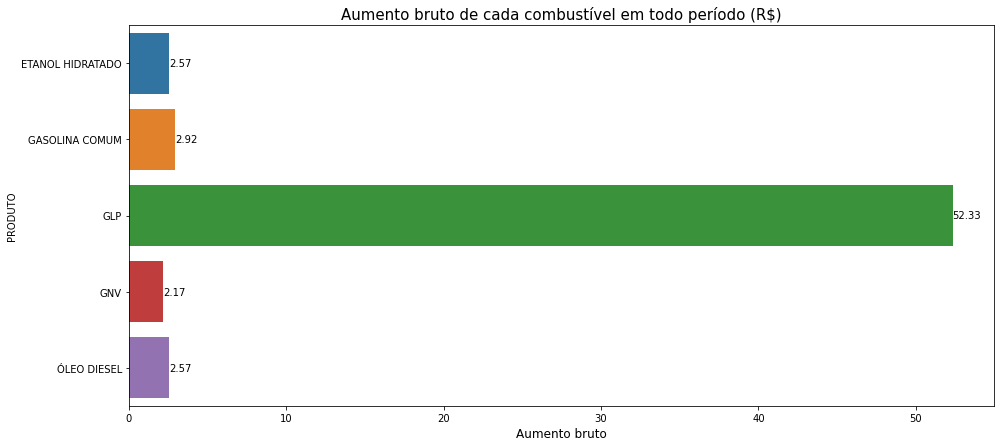

In [23]:
plt.figure(figsize=(15.5,7))
plt.title('Aumento bruto de cada combustível em todo período (R$)', size=15)
grafico_aumento_bruto = sns.barplot(data=aumento_bruto_produto, x='AUMENTO EM REAIS(R$)', y='PRODUTO')
grafico_aumento_bruto.set_xlabel("Aumento bruto", size = 12 ) 
grafico_aumento_bruto.bar_label(grafico_aumento_bruto.containers[0]);

Como um dos objetivos principais na nossa análise exploratória é observar o aumento do valor dos combustíveis, queríamos saber quais os combustíveis que mais sofreram aumento de preço nesses anos. Primeiramente criamos um gráfico com o aumento bruto em reais, de 2004 a 2021. Como é possível observar, fica claro que o combustível que mais sofreu aumento em valores brutos foi o GLP, porém, como comentado anteriormente, isso acontece porque cada combustível tem uma unidade de medida e valor diferente. Por isso, decidimos criar outro gráfico, dessa vez com o aumento percentual.

##### Aumento percentual

In [24]:
aumento_produto = df_gas.pivot_table(index='ANO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
aumento_percentual_produto = ((df_gas.loc[df_gas["ANO"]==2021].groupby(['PRODUTO'])["PREÇO MÉDIO REVENDA"].mean() - df_gas.loc[df_gas["ANO"]==2004].groupby(['PRODUTO'])["PREÇO MÉDIO REVENDA"].mean())/df_gas.loc[df_gas["ANO"]==2004].groupby(['PRODUTO'])["PREÇO MÉDIO REVENDA"].mean())*100
aumento_percentual_produto = aumento_percentual_produto.to_frame()
aumento_percentual_produto['AUMENTO PERCENTUAL'] = aumento_percentual_produto['PREÇO MÉDIO REVENDA'].round(decimals = 0)
aumento_percentual_produto.reset_index(inplace=True)
aumento_percentual_produto.drop(labels = [1,6],axis=0, inplace=True)

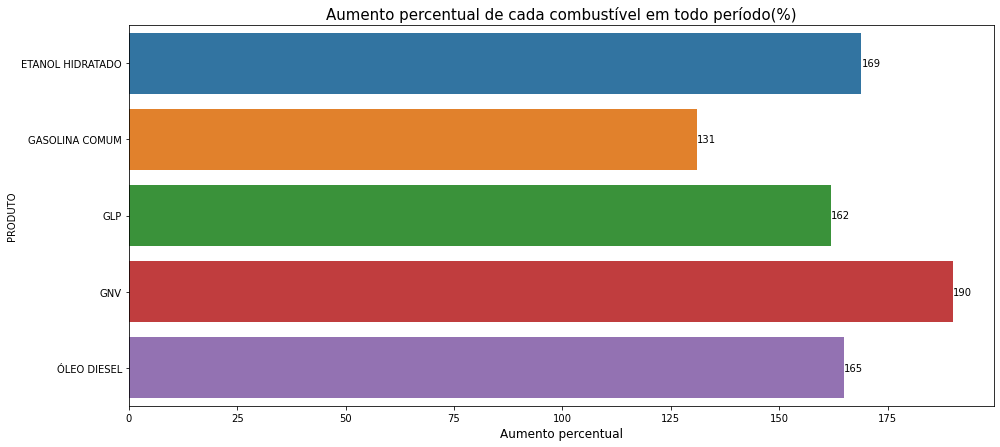

In [25]:
plt.figure(figsize=(15.5,7))
plt.title('Aumento percentual de cada combustível em todo período(%)', size=15)
grafico_aumento_percentual = sns.barplot(data=aumento_percentual_produto, x='AUMENTO PERCENTUAL', y='PRODUTO')
grafico_aumento_percentual.set_xlabel("Aumento percentual", size = 12 ) 
grafico_aumento_percentual.bar_label(grafico_aumento_percentual.containers[0]);

Agora com o aumento percentual, fica mais claro quais combustíveis realmente sofreram o maior aumento, sendo estes o GNV (Gás Natural Veicular), seguido pelo Etanol. Já o GLP, apesar do valor bruto ter sido maior, ele é um dos combustíveis que menos teve aumento nos anos analisados, perdendo somente para a Gasolina comum.

### Média da quantidade de postos pesquisado por estado em 2004 e 2021. Evolução ano a ano.

##### 2004

In [26]:
df_postos_2004 = df_gas.loc[df_gas['ANO']==2004]
df_postos_2004 = df_postos_2004.pivot_table(index='ESTADO', values='NÚMERO DE POSTOS PESQUISADOS', aggfunc='mean').astype(int)
df_postos_2004 = df_postos_2004.sort_values(by='NÚMERO DE POSTOS PESQUISADOS')
df_postos_2004.reset_index(inplace = True)


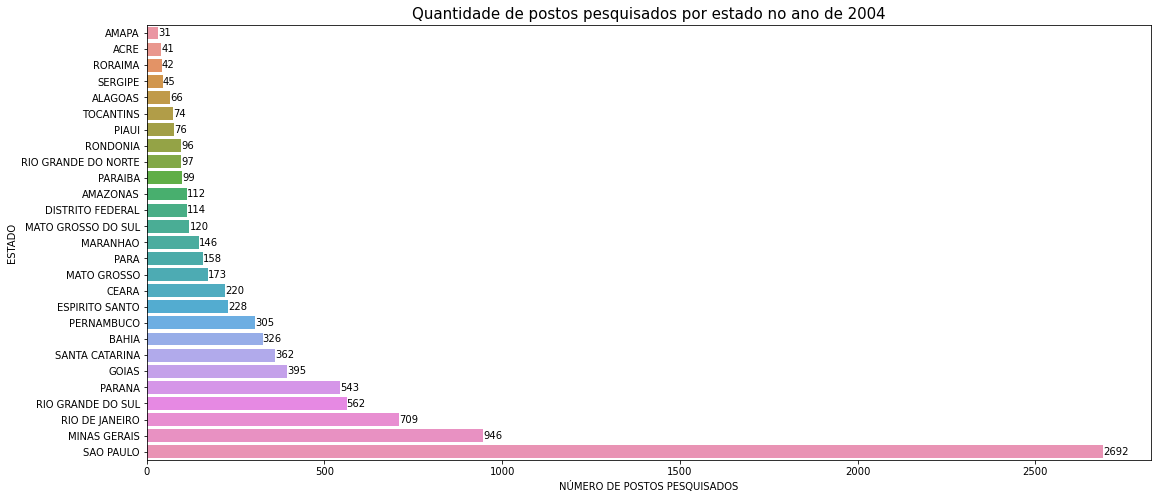

In [27]:
plt.figure(figsize=(18,8))
plt.title('Quantidade de postos pesquisados por estado no ano de 2004', size=15)
grafico_postos_2004 = sns.barplot(data = df_postos_2004, y ='ESTADO', x='NÚMERO DE POSTOS PESQUISADOS')
grafico_postos_2004.bar_label(grafico_postos_2004.containers[0]);

##### 2021

In [28]:
df_postos_2021 = df_gas.loc[df_gas['ANO']==2021]
df_postos_2021 = df_postos_2021.pivot_table(index='ESTADO', values='NÚMERO DE POSTOS PESQUISADOS', aggfunc='mean').astype(int)
df_postos_2021 = df_postos_2021.sort_values(by='NÚMERO DE POSTOS PESQUISADOS')
df_postos_2021.reset_index(inplace = True)

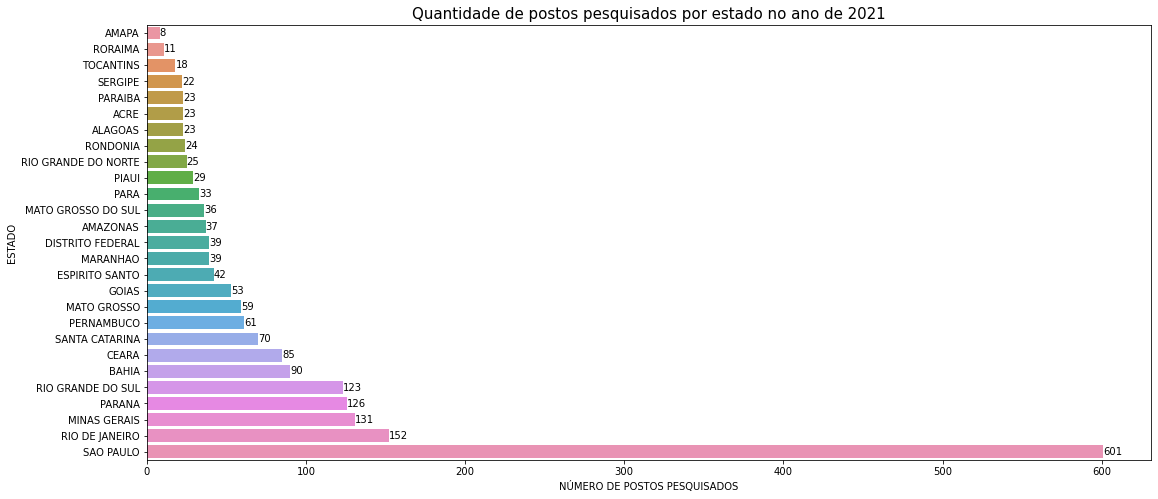

In [29]:
plt.figure(figsize=(18,8))
plt.title('Quantidade de postos pesquisados por estado no ano de 2021', size=15)
grafico_postos_2021 = sns.barplot(data = df_postos_2021, y ='ESTADO', x='NÚMERO DE POSTOS PESQUISADOS')
grafico_postos_2021.bar_label(grafico_postos_2021.containers[0]);

- A distribuição manteve-se relativamente a mesma, São Paulo é o estado com a maior amostragem e o Amapa a com menor.
- Percebemos uma forte queda na amostragem em todos os estados, o que nos levou a plotar o próxmo gráfico.

##### Todos os anos

In [30]:
df_postos = df_gas.pivot_table(index='ANO', values='NÚMERO DE POSTOS PESQUISADOS', aggfunc='mean').astype(int)
df_postos = df_postos.reset_index()

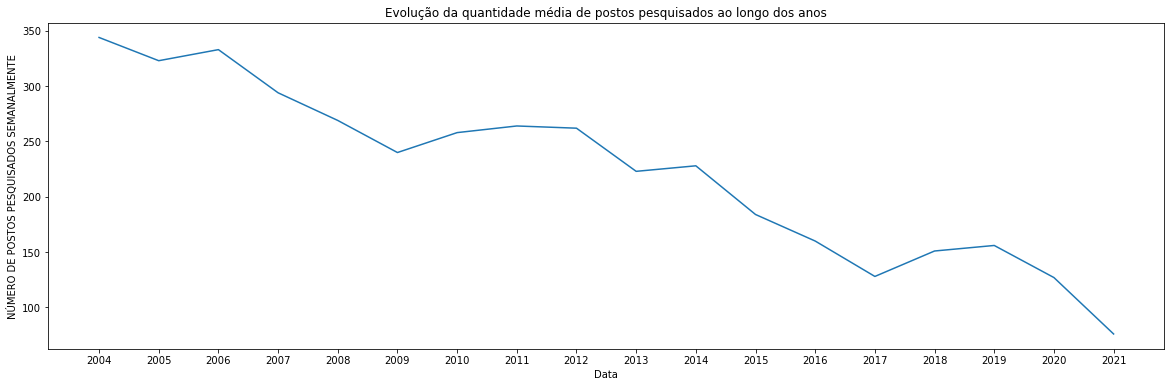

In [31]:
plt.figure(figsize=(20,6))
ax = sns.lineplot(data=df_postos, x='ANO', y='NÚMERO DE POSTOS PESQUISADOS')

ax.set_title('Evolução da quantidade média de postos pesquisados ao longo dos anos')
ax.set_xticks([2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
ax.set_ylabel('NÚMERO DE POSTOS PESQUISADOS SEMANALMENTE')
ax.set_xlabel('Data');

- A amostragem de postos diminuiu significativamente ao longo dos anos.


### Mapas de calor do preço médio e quantidade de postos por estado.

In [32]:
brasil = gpd.read_file('BRUFE250GC_SIR.shp')
brasil

NM_ESTADO     NM_REGIAO CD_GEOCUF  \
0              RONDÔNIA         NORTE        11   
1                  ACRE         NORTE        12   
2              AMAZONAS         NORTE        13   
3               RORAIMA         NORTE        14   
4                  PARÁ         NORTE        15   
5                 AMAPÁ         NORTE        16   
6             TOCANTINS         NORTE        17   
7              MARANHÃO      NORDESTE        21   
8                 PIAUÍ      NORDESTE        22   
9                 CEARÁ      NORDESTE        23   
10  RIO GRANDE DO NORTE      NORDESTE        24   
11              PARAÍBA      NORDESTE        25   
12           PERNAMBUCO      NORDESTE        26   
13              ALAGOAS      NORDESTE        27   
14              SERGIPE      NORDESTE        28   
15                BAHIA      NORDESTE        29   
16         MINAS GERAIS       SUDESTE        31   
17       ESPÍRITO SANTO       SUDESTE        32   
18       RIO DE JANEIRO       SUDESTE        33   
19            SÃO PAULO       SUDESTE        35   
20               PARANÁ           SUL        41   
21       SANTA CATARINA           SUL        42   
22   MATO GROSSO DO SUL  CENTRO-OESTE        50   
23          MATO GROSSO  CENTRO-OESTE        51   
24                GOIÁS  CENTRO-OESTE        52   
25     DISTRITO FEDERAL  CENTRO-OESTE        53   
26    RIO GRANDE DO SUL           SUL        43   

                                             geometry  
0   POLYGON ((-62.86662 -7.97587, -62.86017 -7.982...  
1   POLYGON ((-73.18253 -7.33550, -73.05413 -7.381...  
2   POLYGON ((-67.32609 2.02971, -67.31682 2.00125...  
3   POLYGON ((-60.20051 5.26434, -60.19828 5.26045...  
4   MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ...  
5   MULTIPOLYGON (((-50.18123 1.90099, -50.17688 1...  
6   POLYGON ((-48.35878 -5.17008, -48.35617 -5.171...  
7   MULTIPOLYGON (((-43.99913 -2.39272, -43.99937 ...  
8   POLYGON ((-41.74605 -2.80350, -41.74241 -2.805...  
9   POLYGON ((-40.49717 -2.78451, -40.49173 -2.788...  
10  POLYGON ((-37.25329 -4.83156, -37.25326 -4.831...  
11  MULTIPOLYGON (((-34.85946 -6.98417, -34.85827 ...  
12  MULTIPOLYGON (((-37.23361 -7.27440, -37.23284 ...  
13  POLYGON ((-35.46753 -8.81744, -35.46659 -8.817...  
14  POLYGON ((-37.99089 -9.52623, -37.98933 -9.527...  
15  MULTIPOLYGON (((-38.65484 -18.04242, -38.65819...  
16  POLYGON ((-44.20984 -14.24460, -44.20912 -14.2...  
17  MULTIPOLYGON (((-40.39595 -20.62216, -40.39617...  
18  MULTIPOLYGON (((-44.71892 -23.35908, -44.71956...  
19  MULTIPOLYGON (((-48.03716 -25.35794, -48.03750...  
20  POLYGON ((-52.05188 -22.53933, -52.04607 -22.5...  
21  MULTIPOLYGON (((-48.82145 -28.61110, -48.82159...  
22  POLYGON ((-56.10370 -17.17354, -56.10209 -17.1...  
23  POLYGON ((-57.93439 -7.65677, -57.93044 -7.657...  
24  POLYGON ((-50.16015 -12.42007, -50.15836 -12.4...  
25  POLYGON ((-48.20054 -15.50026, -48.14051 -15.5...  
26  POLYGON ((-53.03183 -27.15947, -53.02991 -27.1...

In [33]:
# Corrigindo o nome dos Estados
estados_check = {"RONDÔNIA":"RONDONIA", "PARÁ":"PARA", "AMAPÁ":"AMAPA", "MARANHÃO":"MARANHAO",
             "PIAUÍ":"PIAUI", "CEARÁ":"CEARA", "PARAÍBA":"PARAIBA", "ESPÍRITO SANTO":"ESPIRITO SANTO",
             "SÃO PAULO":"SAO PAULO", "PARANÁ":"PARANA", "GOIÁS":"GOIAS", "ACRE":"ACRE",
             "AMAZONAS":"AMAZONAS", "RORAIMA":"RORAIMA", "TOCANTINS":"TOCANTINS", 
             "RIO GRANDE DO NORTE":"RIO GRANDE DO NORTE", "PERNAMBUCO":"PERNAMBUCO", 
             "ALAGOAS":"ALAGOAS", "SERGIPE":"SERGIPE", "BAHIA":"BAHIA", "MINAS GERAIS":"MINAS GERAIS",
             "RIO DE JANEIRO":"RIO DE JANEIRO", "SANTA CATARINA":"SANTA CATARINA", "MATO GROSSO DO SUL":"MATO GROSSO DO SUL", 
             "MATO GROSSO":"MATO GROSSO", "DISTRITO FEDERAL":"DISTRITO FEDERAL", "RIO GRANDE DO SUL":"RIO GRANDE DO SUL"}

brasil["NM_ESTADO"] = brasil.NM_ESTADO.map(estados_check)

# Corrigindo região
brasil["NM_REGIAO"] = brasil.NM_REGIAO.str.replace("-", " ")

In [34]:
# Alterando colunas 
brasil.columns = ['ESTADO', 'REGIÃO', 'CD_GEOCUF', 'geometry']
brasil

ESTADO        REGIÃO CD_GEOCUF  \
0              RONDONIA         NORTE        11   
1                  ACRE         NORTE        12   
2              AMAZONAS         NORTE        13   
3               RORAIMA         NORTE        14   
4                  PARA         NORTE        15   
5                 AMAPA         NORTE        16   
6             TOCANTINS         NORTE        17   
7              MARANHAO      NORDESTE        21   
8                 PIAUI      NORDESTE        22   
9                 CEARA      NORDESTE        23   
10  RIO GRANDE DO NORTE      NORDESTE        24   
11              PARAIBA      NORDESTE        25   
12           PERNAMBUCO      NORDESTE        26   
13              ALAGOAS      NORDESTE        27   
14              SERGIPE      NORDESTE        28   
15                BAHIA      NORDESTE        29   
16         MINAS GERAIS       SUDESTE        31   
17       ESPIRITO SANTO       SUDESTE        32   
18       RIO DE JANEIRO       SUDESTE        33   
19            SAO PAULO       SUDESTE        35   
20               PARANA           SUL        41   
21       SANTA CATARINA           SUL        42   
22   MATO GROSSO DO SUL  CENTRO OESTE        50   
23          MATO GROSSO  CENTRO OESTE        51   
24                GOIAS  CENTRO OESTE        52   
25     DISTRITO FEDERAL  CENTRO OESTE        53   
26    RIO GRANDE DO SUL           SUL        43   

                                             geometry  
0   POLYGON ((-62.86662 -7.97587, -62.86017 -7.982...  
1   POLYGON ((-73.18253 -7.33550, -73.05413 -7.381...  
2   POLYGON ((-67.32609 2.02971, -67.31682 2.00125...  
3   POLYGON ((-60.20051 5.26434, -60.19828 5.26045...  
4   MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ...  
5   MULTIPOLYGON (((-50.18123 1.90099, -50.17688 1...  
6   POLYGON ((-48.35878 -5.17008, -48.35617 -5.171...  
7   MULTIPOLYGON (((-43.99913 -2.39272, -43.99937 ...  
8   POLYGON ((-41.74605 -2.80350, -41.74241 -2.805...  
9   POLYGON ((-40.49717 -2.78451, -40.49173 -2.788...  
10  POLYGON ((-37.25329 -4.83156, -37.25326 -4.831...  
11  MULTIPOLYGON (((-34.85946 -6.98417, -34.85827 ...  
12  MULTIPOLYGON (((-37.23361 -7.27440, -37.23284 ...  
13  POLYGON ((-35.46753 -8.81744, -35.46659 -8.817...  
14  POLYGON ((-37.99089 -9.52623, -37.98933 -9.527...  
15  MULTIPOLYGON (((-38.65484 -18.04242, -38.65819...  
16  POLYGON ((-44.20984 -14.24460, -44.20912 -14.2...  
17  MULTIPOLYGON (((-40.39595 -20.62216, -40.39617...  
18  MULTIPOLYGON (((-44.71892 -23.35908, -44.71956...  
19  MULTIPOLYGON (((-48.03716 -25.35794, -48.03750...  
20  POLYGON ((-52.05188 -22.53933, -52.04607 -22.5...  
21  MULTIPOLYGON (((-48.82145 -28.61110, -48.82159...  
22  POLYGON ((-56.10370 -17.17354, -56.10209 -17.1...  
23  POLYGON ((-57.93439 -7.65677, -57.93044 -7.657...  
24  POLYGON ((-50.16015 -12.42007, -50.15836 -12.4...  
25  POLYGON ((-48.20054 -15.50026, -48.14051 -15.5...  
26  POLYGON ((-53.03183 -27.15947, -53.02991 -27.1...

In [35]:
# Merge com a tabela do IBGE - brasil
df_estado = df_gas.pivot_table(index='ESTADO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean').reset_index()
df_brasil = brasil.merge(df_estado, how = 'left')
df_brasil.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ESTADO              27 non-null     object  
 1   REGIÃO              27 non-null     object  
 2   CD_GEOCUF           27 non-null     object  
 3   geometry            27 non-null     geometry
 4   ETANOL HIDRATADO    27 non-null     float64 
 5   GASOLINA ADITIVADA  27 non-null     float64 
 6   GASOLINA COMUM      27 non-null     float64 
 7   GLP                 27 non-null     float64 
 8   GNV                 26 non-null     float64 
 9   ÓLEO DIESEL         27 non-null     float64 
 10  ÓLEO DIESEL S10     27 non-null     float64 
dtypes: float64(7), geometry(1), object(3)
memory usage: 2.5+ KB


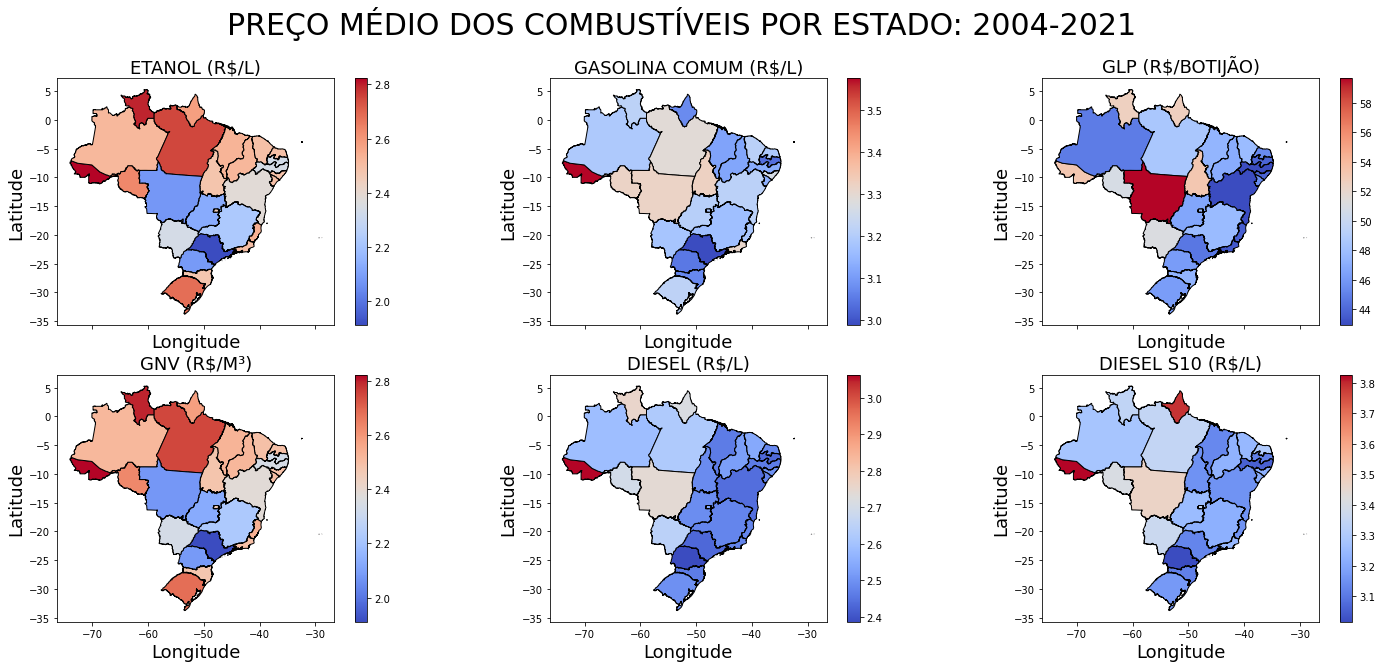

In [36]:
fig, axs = plt.subplots(2,3, sharex=True, figsize=(25,10))
fig.suptitle('PREÇO MÉDIO DOS COMBUSTÍVEIS POR ESTADO: 2004-2021', fontsize=30)

# Grafico 1 - ETANOL HIDRATADO 
axs[0,0].set_title('ETANOL (R$/L)',fontsize=18)
axs[0,0].set_ylabel("Latitude", fontsize=18)
axs[0,0].set_xlabel("Longitude", fontsize=18)
df_brasil.plot(ax=axs[0,0], column='ETANOL HIDRATADO', legend=True, cmap="coolwarm", edgecolor='black')

# Grafico 2 - GASOLINA COMUM
axs[0,1].set_title('GASOLINA COMUM (R$/L)',fontsize=18)
axs[0,1].set_ylabel("Latitude", fontsize=18)
axs[0,1].set_xlabel("Longitude", fontsize=18)
df_brasil.plot(ax=axs[0,1], column='GASOLINA COMUM', legend=True, cmap="coolwarm", edgecolor='black')

# Grafico 3 - GLP
axs[0,2].set_title('GLP (R$/BOTIJÃO)',fontsize=18)
axs[0,2].set_ylabel("Latitude", fontsize=18)
axs[0,2].set_xlabel("Longitude", fontsize=18)
df_brasil.plot(ax=axs[0,2], column='GLP', legend=True, cmap="coolwarm", edgecolor='black')

# Grafico 4 - GNV
axs[1,0].set_title('GNV (R$/M³)',fontsize=18)
axs[1,0].set_ylabel("Latitude", fontsize=18)
axs[1,0].set_xlabel("Longitude", fontsize=18)
df_brasil.plot(ax=axs[1,0], column='ETANOL HIDRATADO', legend=True, cmap="coolwarm", edgecolor='black')

# Grafico 5 - DIESEL
axs[1,1].set_title('DIESEL (R$/L)',fontsize=18)
axs[1,1].set_ylabel("Latitude", fontsize=18)
axs[1,1].set_xlabel("Longitude", fontsize=18)
df_brasil.plot(ax=axs[1,1], column='ÓLEO DIESEL', legend=True, cmap="coolwarm", edgecolor='black')

# Grafico 6 - DIESEL S10
axs[1,2].set_title('DIESEL S10 (R$/L)',fontsize=18) 
axs[1,2].set_ylabel("Latitude", fontsize=18)
axs[1,2].set_xlabel("Longitude", fontsize=18)
df_brasil.plot(ax=axs[1,2], column='ÓLEO DIESEL S10', legend=True, cmap="coolwarm", edgecolor='black');

- Máximos:

ETANOL HIDRATADO, GASOLINA, DIESEL, DIESEL S10 - ACRE;  

DIESEL S10 - ACRE E AMAPA;

GLP - MATO GROSSO;

GNV - DISTRITO FEDERAL.

- Mínimos:

DIESEL S10 E DIESEL - PARANA;

GNV - PIAUI;

GLP - PERNAMBUCO;

ETANOL, GASOLINA - SAO PAULO

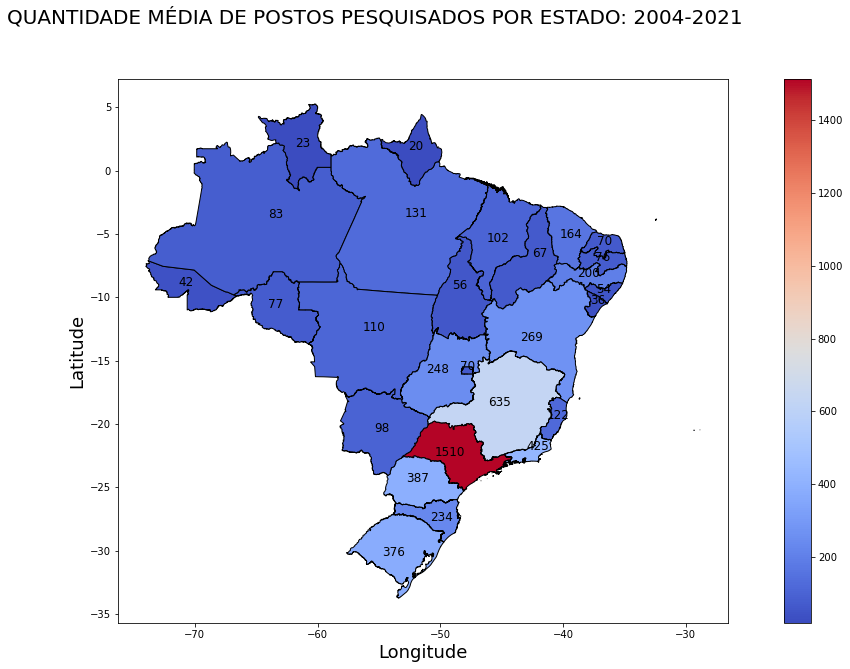

In [37]:
df_estadoQntE = df_gas.pivot_table(index='ESTADO', values='NÚMERO DE POSTOS PESQUISADOS', aggfunc='mean').reset_index()
df_brasilQntE = brasil.merge(df_estadoQntE, how = 'left')

fig, axs = plt.subplots(sharex=True, figsize=(20,10))
fig.suptitle('QUANTIDADE MÉDIA DE POSTOS PESQUISADOS POR ESTADO: 2004-2021', fontsize=20)

axs.set_title('',fontsize=18)
axs.set_ylabel("Latitude", fontsize=18)
axs.set_xlabel("Longitude", fontsize=18)

df_brasilQntE.plot(ax=axs, column='NÚMERO DE POSTOS PESQUISADOS', legend=True, cmap="coolwarm", edgecolor='black');

df_brasilQntE['coords'] = df_brasilQntE['geometry'].apply(lambda x: x.representative_point().coords[:])
df_brasilQntE['coords'] = [coords[0] for coords in df_brasilQntE['coords']]

for idx, row in df_brasilQntE.iterrows():
          axs.annotate(int(row[str('NÚMERO DE POSTOS PESQUISADOS')]), xy=row['coords'], horizontalalignment='center', color='black', fontsize='12')